<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Optimización
**Entrada:** Arreglo de $n$ números $[a_1, a_2, \ldots , a_n]$.

**Salida:** Índices $i$ y $j$ del arreglo $a$ con $0 \leq i \leq j \leq n$ de forma que la suma $\sum\limits_{x=i}^{j} a_x$ sea la máxima posible.

El problema del **máximo sub-arreglo** es un problema de optimización de $\text{clase P}$ que se basa en encontrar un sub-arreglo donde la suma de todos sus elementos sea un número lo mas grande posible. Este problema es muy estudiado puesto que tiene muchas aplicaciones, por ejemplo:


*   Procesamiento de señales y monitoreo de frecuencias.
*   Identificar la zona mas brillante de una imagen en visión por computador.



# 1. MaxSubArrayMid
El algoritmo MaxSubArrayMid se encarga de encontrar el mayor sub-arreglo dentro de un arreglo con la condición de que se debe incluir el elemento central del mismo. Este es usado posteriormente por el algoritmo MaxSubArray.

## 1.1 Implementación

In [145]:
from functools import reduce

def maxSubArrayMid(A, s, m, e):

    # Inicializamos variables
    auxSum = 0 # Suma auxiliar para comparar
    leftSum = float('-inf') # Suma total lado izquierdo, inicializada en un número infinitamente pequeño para primera iteración
    sub_i = m # Índice i del sub-arreglo inicializado en mid

    # Recorremos desde [mid..start] con paso -1
    for i in range(m,s-1,-1):
        auxSum = auxSum + A[i]
        if(auxSum > leftSum): # Si la suma acumulada es mayor a la del sub-arreglo mínimo izquierdo
          leftSum = auxSum # Actualizamos suma sub-arreglo
          sub_i = i # Actualizamos i
    
    # Inicializamos variables
    auxSum = 0 # Suma auxiliar para comparar
    rightSum = float('-inf') # Suma total lado derecho, inicializada en un número infinitamente pequeño para primera iteración
    sub_j = m+1 # Índice j del sub-arreglo
    
    # Recorremos desde [mid+1..end]
    for j in range(m+1,e+1):
        auxSum = auxSum + A[j]
        if(auxSum > rightSum): # Si la suma acumulada es mayor a la del sub-arreglo mínimo derecho
            rightSum = auxSum # Actualizamos suma sub-arreglo
            sub_j = j # Actualizamos j

    # Se suma cada elemento del sub-arreglo
    sumT = 0
    for i in range(sub_i,sub_j+1): sumT = sumT + A[i]

    # Retornamos los índices y sum
    return sub_i, sub_j, sumT

In [146]:
arr = [-50, 100, -20, -5, 1, 16, 32, -8, 9]
i, j, sum = maxSubArrayMid(arr, 0, 4, 8)

print(f"Arreglo de entrada A: {arr}")
print(f"Sub-arreglo máximo: {arr[i:j+1]}")
print(f"Suma: {sum}")

Arreglo de entrada A: [-50, 100, -20, -5, 1, 16, 32, -8, 9]
Sub-arreglo máximo: [100, -20, -5, 1, 16, 32, -8, 9]
Suma: 125


## 1.2 Descripción del algoritmo
El algoritmo MaxSubArrayMid se encarga de encontrar un sub-arreglo a partir de un arreglo de entrada que maximize la suma de todos sus elementos.

1.   La función recibe como argumentos el arreglo `A`, el índice inicial `s`, el índice central `m` y el índice final `e`.
2.   Se inicializan 3 variables: `auxSum = 0`, `leftSum = float('-inf')` que es la suma del lado izquierdo inicializada en un número infinitamente pequeño y `sub_i` que será el primer índice del sub-arreglo.
3.   En un bucle iteramos la variable `i` desde `m` hasta `s` con paso `-1`, e iremos sumando cada elemento `A[i]` en `auxSum`.
4. En cada iteración se compara `auxSum` con `leftSum`, y si `auxSum` es mayor el índice `sub_i` se iguala a la variable `i` y `leftSum` se actualiza igualando el valor de `auxSum`. En caso contrario, no se hará nada y se pasa a la siguiente iteración.
5.   Se inicializan 3 variables: `auxSum = 0`, `rightSum = float('-inf')` que es la suma del lado derecho inicializada en un número infinitamente pequeño y `sub_j` que es el último índice del sub-arreglo.
6.   En un bucle iteramos la variable `j` desde `m` hasta `e` e iremos sumando cada elemento `A[j]` en `auxSum`.
7. En cada iteración se compara `auxSum` con `rightSum` y si `auxSum` es mayor el índice `sub_j` se iguala a la variable `j` y `rightSum` se actualiza igualando el valor de `auxSum`. En caso contrario, no se hará nada y se pasa a la siguiente iteración.
8. Finalmente la función retorna una tupla que contiene ambos índices y además la suma de los elementos: `(sub_i, sub_j, sum)`.



# 2. MaxSubArray
MaxSubArray es un algoritmo recursivo que resuelve el problema del máximo sub-arreglo basandose en el paradigma de diseño divide y vencerás.

## 2.1 Implementación

In [ ]:
from termcolor import colored
count = 0 # Contador para ordenar verbose
def maxSubArray(A, s, e, verbose=False):
    global count
    
    if(verbose and count == 0):
      print(f"Arreglo: {A[s:e+1]}")
    elif(verbose):
      print(f"{str(abs(count)*'  ')}Sub-arreglo: {A[s:e+1]}")

    # Caso base de sub-arreglo de tamaño 1
    if (e == s):
        if(verbose):
          print(f"{str(abs(count)*'  ')}Caso base, i({s}) == j({e}). Retornando indices y unico elemento: ({s},{e},{A[s]})")
          count = count-1
        return s, e, A[s]
        
    else:
        mid = ((s + e) // 2)
        #print(mid)
        if(verbose):
          #print(f"{str(abs(count)*'  ')}Calculamos elemento central {colored(str(str(s+e) + '//' + '2 = ' + str(mid)), 'red')}")
          print(f"{str(abs(count)*'  ')}Dividimos el arreglo en {colored(str(A[s:mid+1]), 'blue')} y {colored(str(A[mid+1:e+1]), 'green')}")

        # Calculamos el máximo sub-arreglo en A[0...mid]
        if(verbose):
          print(f"\n{str(abs(count)*'  ')}Calculamos el máximo sub-arreglo en la izquierda: {colored(str(A[s:mid+1]), 'blue')}")
          count = count + 1
        l_i, l_j, l_sum = maxSubArray(A, s, mid, verbose=verbose)

        # Calculamos el máximo sub-arreglo en A[mid+1...n]
        if(verbose):
          print(f"\n{str(abs(count)*'  ')}Calculamos el máximo sub-arreglo en la derecha: {colored(str(A[mid+1:e+1]), 'green')}")
          count = count + 1
        r_i, r_j, r_sum = maxSubArray(A, mid + 1, e, verbose=verbose)
      
        # Calculamos el máximo sub-arreglo que pasa por 'mid'
        if(verbose):
          print(f"\n{str(abs(count)*'  ')}Calculamos el máximo sub-arreglo que pasa por mid para {A[s:e+1]}")
          count = count + 1
        mid_i, mid_j, mid_sum = maxSubArrayMid(A, s, mid, e)
        if(verbose):
          print(f"{str(abs(count)*'  ')}Sub-arreglo de mid: {colored(str(A[mid_i:mid_j+1]), 'magenta')}\n")

        # Suma izquierda 'l' es mayor que 'r' y 'mid'
        if (l_sum >= r_sum and l_sum >= mid_sum):
            if(verbose):
              count = count-1
              print(f"{str(abs(count)*'  ')}El sub-arreglo izquierdo {colored(str(A[l_i:l_j+1]), 'blue')} es el mayor para el arreglo {A[s:e+1]}, lo retornamos.")
            return l_i, l_j, l_sum

        # Suma derecha 'r' es mayor que 'l'y 'mid'
        elif (r_sum >= l_sum and r_sum >= mid_sum):
          if(verbose):
            count = count-1
            print(f"{str(abs(count)*'  ')}El sub-arreglo derecho {colored(str(A[r_i:r_j+1]), 'green')} es el mayor para el arreglo {A[s:e+1]}, lo retornamos.")
          return r_i, r_j, r_sum

        # Suma 'mid' es mayor
        else:
          if(verbose):
            count = count-1
            print(f"{str(abs(count)*'  ')}El sub-arreglo que pasa por mid {colored(str(A[mid_i:mid_j+1]), 'magenta')} es el mayor para el arreglo {A[s:e+1]}, lo retornamos.")
          return mid_i, mid_j, mid_sum

In [ ]:
arr = [-100,50,-20,30,40,-5,70,-60,10,1]
i, j, sum = maxSubArray(arr, 0, 9)

print(f"Arreglo de entrada: {arr}")
print(f"Sub-arreglo máximo: {arr[i:j+1]}")
print(f"Suma: {sum}")

Arreglo de entrada: [-100, 50, -20, 30, 40, -5, 70, -60, 10, 1]
Sub-arreglo máximo: [50, -20, 30, 40, -5, 70]
Suma: 165


## 2.2 Descripción del algoritmo
Esta implementación del algoritmo está diseñada bajo el paradigma **Divide y Vencerás**, sub-dividiendo el tamaño del problema recursivamente para reducir su complejidad.


1.   La función retorna los índices del arreglo y su único elemento cuando los **índices son iguales**. Este corresponde al **caso base**.
2.   En caso contrario, el algoritmo calcula el elemento central del arreglo mediante una división entera entre 2: `mid = (i + j) // 2`.
3.   A partir del elemento `mid`,  el algoritmo sub-divide el problema llamando recursivamente a la función con 2 pares de índices que corresponden a los sub-arreglos: $A[i \ldots\text{mid}]$ y $A[\text{mid}+1 \ldots j]$. Además, se calcula un 3er sub-arreglo utilizando la función `maxSubArrayMid`, que encontrará un sub-arreglo máximo que pase por el elemento `mid`.
4.   El algoritmo comparará las sumas totales de los 3 sub-arreglos en los que se dividió el problema:
*   Si la suma de los elementos del sub-arreglo izquierdo $A[i \ldots j]$ con $0 \leq i \leq j \leq \text{mid}$ es mayor, retornamos sus índices y suma.
*   Si la suma de los elementos del sub-arreglo derecho $A[i \ldots j]$ con $\text{mid}+1 \leq i \leq j \leq n$ es mayor, retornamos sus índices y suma.
*   Si la suma de los elementos del sub-arreglo que pasa por el elemento $A[\text{mid}]$ es la mayor, retornamos sus índices y suma.




## 2.3 Ejemplo de ejecución

Tomemos el arreglo $A = [-4,3,1,-2]$

![picture](https://i.imgur.com/3LaGldl.png)

Primero calculamos su índice central mediante división entera `len(A) // 2 = 2`.

Ahora, dividiremos $A$ en $[-4,3]$ y $[1,-2]$ y le pasaremos sus respectivos índices recursivamente al algoritmo.

### **Primera mitad (parte izquierda) del arreglo inicial**

Ahora se toma el arreglo $[-4,3]$ y se calcula su índice central que es $1$ y se divide en los sub-arreglos $[-4]$ y $[3]$, y le pasamos sus índices recursivamente a la función.

Para el caso de $[-4]$, es el caso base por lo que la función retornará su índice y su único elemento como la suma.

Para el caso de $[3]$, es el caso base por lo que la función retornará su índice y su único elemento como la suma.

Luego se toma el arreglo $[-4,3]$ y se lo pasamos a la función `maxSubArrayMid` para calcular el máximo sub-arreglo que pasa por el centro. Esta función retornará el sub-arreglo $[-4,3]$ y la suma $-1$.

Ahora la función comparará las sumas del sub-arreglo derecho, izquierdo y del que pasa por el centro. En este caso, el sub-arreglo $[3]$ es el mayor por lo que retornamos su índice y la suma $3$. **Recordar que este resultado corresponde al máximo sub-arreglo contenido en primera mitad del arreglo inicial**.

### **Segunda mitad (parte derecha) del arreglo inicial**

Ya que tenemos el máximo sub-arreglo de la primera mitad, se procede con la segunda mitad $[1,-2]$. Calculamos su elemento central y lo dividimos en 2 sub-arreglos $[1]$ y  $[-2]$.

Para el caso de $[1]$, es el caso base por lo que la función retornará su índice y su único elemento como la suma.

Para el caso de $[-2]$, es el caso base por lo que la función retornará su índice y su único elemento como la suma.

Luego se toma el arreglo $[1,-2]$ y se lo pasamos a la función `maxSubArrayMid` para calcular el máximo sub-arreglo que pasa por el centro. Esta función retornará el índice del sub-arreglo $[1]$ y la suma $1$.

Ahora se comparan las sumas de cada uno, y en este caso la suma máxima corresponde al sub-arreglo $[1]$, por lo que retornamos sus índices. **Recordar que este resultado corresponde al máximo sub-arreglo contenido en segunda mitad del arreglo inicial**.

### **Elemento que pasa por la mitad del arreglo inicial**

Y ahora que ya se calcularon las 2 mitades del arreglo inicial, ahora le pasamos el arreglo inicial $A = [-4,3,1,-2]$ a la función `maxSubArrayMid`.
Esta función retornará el sub-arreglo $[3,1]$ y la suma 4 **Recordar que este resultado corresponde al máximo sub-arreglo que pasa por el centro del arreglo inicial**.

Ahora que ya tenemos los 3 sub-arreglos principales del arreglo inicial A son comparados, y en este caso la suma mayor la tiene el máximo sub-arreglo que pasa por el centro de A que corresponde a $[3,1]$, por lo que la función lo retorna como solución.

## 2.4 Ejecución paso a paso (`verbose = True`)

In [ ]:
arr = [-4,3,1,-2]
count = 0 # Contador para ordenar verbose
i, j, s = maxSubArray(arr, 0, 3, verbose=True)
print(f"\nIndices i, j: {i}, {j}")

Arreglo: [-4, 3, 1, -2]
Dividimos el arreglo en [-4, 3] y [1, -2]

Calculamos el máximo sub-arreglo en la izquierda: [-4, 3]
  Sub-arreglo: [-4, 3]
  Dividimos el arreglo en [-4] y [3]

  Calculamos el máximo sub-arreglo en la izquierda: [-4]
    Sub-arreglo: [-4]
    Caso base, i(0) == j(0). Retornando indices y unico elemento: (0,0,-4)

  Calculamos el máximo sub-arreglo en la derecha: [3]
    Sub-arreglo: [3]
    Caso base, i(1) == j(1). Retornando indices y unico elemento: (1,1,3)

  Calculamos el máximo sub-arreglo que pasa por mid para [-4, 3]
    Sub-arreglo de mid: [-4, 3]

  El sub-arreglo derecho [3] es el mayor para el arreglo [-4, 3], lo retornamos.

  Calculamos el máximo sub-arreglo en la derecha: [1, -2]
    Sub-arreglo: [1, -2]
    Dividimos el arreglo en [1] y [-2]

    Calculamos el máximo sub-arreglo en la izquierda: [1]
      Sub-arreglo: [1]
      Caso base, i(2) == j(2). Retornando indices y unico elemento: (2,2,1)

    Calculamos el máximo sub-arreglo en la derec

# 3. Correctitud

## 3.1 Correctitud de MaxSubArrayMid
###**Teorema**
> *El algoritmo **MaxSubArrayMid** retorna el sub-arreglo máximo del arreglo de entrada que contiene al elemento **mid**.*

### Prueba del Teorema

Para probar el teorema, utilizaremos 2 propiedades invariantes de bucle, ya que esta función tiene 2 ciclos que corresponden a buscar el sub-arreglo en las partes derecha e izquierda del arreglo.

Para el primer bucle, es decir, el que itera sobre la parte izquierda del arreglo utilizaremos la siguiente **propiedad invariante de bucle**:
> *Al comienzo de cada iteración $i$ se cumple que $A[\text{sub_i} \ldots \text{mid}]$ corresponde al máximo sub-arreglo contenido dentro del sub-arreglo $A[i \ldots \text{mid}]$ que contiene al elemento $A[\text{mid}]$.*

***Nota:*** *La variable $\text{sub_i}$ corresponde al índice izquierdo del sub-arreglo máximo.*

### **Inicialización**
En la primera iteración, $i$ tomará el valor del índice del elemento $\text{mid}$, por lo que el sub-arreglo $A[i \ldots \text{mid}]$ contendrá al único elemento $\text{mid}$, y al ser un único elemento es trivialmente el máximo. A la vez, $\text{sub_i}$ es inicializada con el valor del índice de $\text{mid}$ por lo que igualmente se cumple la propiedad.

### **Mantención**
En cada iteración $i$, se compara la suma de los elementos $A[i \ldots \text{mid}]$ con la suma de los elementos $A[\text{sub_i} \ldots \text{mid}]$, y solo cuando esta última es menor, se actualiza el valor del índice $\text{sub_i}$ al valor de $i$, por lo que la propiedad se cumple en cada iteración.

### **Correctitud**
Ya que probamos que la **propiedad invariante de bucle** se cumple al inicio y en cada iteración, queda demostrado que la primera parte de ***MaxSubArrayMid*** es correcta.


Para el segundo bucle, es decir, el que itera sobre la parte derecha del arreglo definimos la siguiente **propiedad invariante de bucle**:
> *Al comienzo de cada iteración $j$ se cumple que $A[\text{mid} \ldots \text{sub_j}]$ corresponde al máximo sub-arreglo contenido dentro del sub-arreglo $A[mid+1 \ldots \text{j}]$.*

La prueba de esta propiedad es similar a la anterior, por lo que la omitiremos.

## 3.2 Correctitud de MaxSubArray

###**Hipótesis**

> *Nuestra hipótesis  $P(n)$ es que el algoritmo **MaxSubArray** retorna el sub-arreglo máximo del arreglo de entrada de tamaño $n$.*

### Prueba de la Hipótesis

Para probar la correctitud de este algoritmo utilizaremos ***inducción matemática***:

**Caso Base:** El caso base de este algoritmo corresponde cuando el arreglo de entrada tiene tamaño 1 ($n = 1$). En este caso, el algoritmo retorna el único elemento contenido que trivialmente es el máximo posible, por lo que $P(1)$ es correcto.

**Paso Inductivo:** Primero asumiremos que el algoritmo es correcto para $P(n)$ cuando $n>1$.

Ahora, demostraremos que el algoritmo es correcto para una entrada $P(2n)$.

El problema se divide en 3:


*   Encontrar el sub-arreglo máximo de la primera mitad del arreglo $A[0 \ldots mid]$, que tendría tamaño $n$ y por **hipótesis inductiva** sabemos que $P(n)$ **es correcto.**
*   Encontrar el sub-arreglo máximo de la segunda mitad del arreglo $A[mid+1 \ldots n]$, que tendría tamaño $n$ y por **hipótesis inductiva** sabemos que $P(n)$ **es correcto.**
*   Encontrar el sub-arreglo máximo que pase por $\text{mid}$, esto lo hacemos mediante el algoritmo ***MaxSubArrayMid***, que anteriormente probamos que es correcto.

Ya que el algoritmo comparará los 3 casos mencionados anteriormente y retornará uno de estos y además probamos que estos son correctos, podemos decir que **MaxSubArray** es correcta. $\blacksquare$


# 4. Tiempo de Ejecución

## 4.1 **Teorema**
> *El algoritmo **MaxSubArray** tiene un tiempo de ejecución de orden $O(n \log{n})$ para el mejor y peor caso.*

## 4.2 Prueba del Teorema

Para probar el teorema propuesto, primero se encontrará una **función de recurrencia** y luego se resolverá utilizando el **Teorema Maestro**.

### 4.2.1 Función de recurrencia
La implementación de este algoritmo está basada en la **recursión**, por lo que para estudiar su tiempo de ejecución primero definiremos una **función de recurrencia** $T(n)$ donde $n$ es el tamaño del problema.

El **caso base** de este algoritmo corresponde a un sub-arreglo de tamaño $1$, y el algoritmo retorna este mismo sub-arreglo por lo que diremos que $T(1) = O(1)$, es decir, su tiempo de ejecución es **constante**.

En caso contrario cuando $n > 1$, el algoritmo ejecuta las siguientes operaciones:


*   Dividir el arreglo en $2$ y llamar recursivamente a la función 2 veces con estos sub-arreglos, es decir, $2 \cdot T(\frac{n}{2})$.
*   Se llama al algoritmo ***MaxSubArrayMid*** para encontrar el sub-arreglo máximo que contenga el elemento central del arreglo principal. Su implementación tiene **complejidad lineal** $O(n)$.

A partir de esto podemos establecer la **función de recurrencia** para el algoritmo MaxSubArray:

$ T(n) = \begin{cases} 
      O(1) & n=1 \\
      2T(n/2) + O(n) & n>1\\
   \end{cases}
$


### 4.2.2 Teorema Maestro

Ahora que tenemos la función de recurrencia del algoritmo, podemos aplicar el **Teorema Maestro** para resolverla y así obtener una cota asintótica, ya que esta función cumple con la condición de ser de la forma: $T(n) \leq aT(n/b) + O(n^d)$.

Para aplicar este teorema, primero debemos identificar los parámetros $a, b$ y $d$ en nuestra función:

$T(n) = \color{red}{2}T(n/\color{red}{2}) + O(n^{\color{red}{1}})$

Observando la función es fácil darse cuenta que estos corresponden a: $a = 2, b = 2 \ \text{y} \ d = 1$.

Ahora que tenemos los parámetros, debemos fijarnos en el teorema y ver el caso al que corresponde nuestra recurrencia:

$ T(n) = \begin{cases} 
      \color{red} {O(n^d \log{n})} & \text{si } \color{red}{a = b^d} \text{ [caso 1]} \\
      O(n^d) & \text{si } a < b^d \text{ [caso 2]} \\
      O(n^{\log_b{a}}) & \text{si } a > b^d \text{ [caso 3]} 
   \end{cases}
$

Como podemos ver, la función **cumple con el caso 1 del teorema maestro**, por lo que reemplazamos los parámetros y obtenemos que el **tiempo de ejecución de nuestro algoritmo corresponde a** $O(n \log{n})$. $\blacksquare$

# 5. Experimentos

## 5.1 Experimento 1: Tiempos de ejecución de MaxSubArray v/s Algoritmo de Kadane

En este experimento compararemos los tiempos de ejecución de nuestro algoritmo y el Algoritmo de Kadane, que es un algoritmo que resuelve muy eficientemente el problema del **sub-arreglo máximo** en **tiempo lineal** $O(n)$.

La configuración del experimento será tamaños de problema $n \in [5,500]$ con muestras aleatorias en el intervalo $[-500,500]$.

### 5.1.1 Implementación del Algoritmo de Kadane

In [ ]:
def kadane(A,size):
    maxSum = float('-inf')
    maxTemp = 0
       
    for i in range(0, size):
        # Sumamos el elemento actual
        maxTemp = maxTemp + A[i]
        
        # Si el máximo auxiliar es menor a la suma máxima, actualizamos maxSum
        if (maxSum < maxTemp): maxSum = maxTemp

        # Si el máximo temp es negativo, seteamos en 0
        if maxTemp < 0: maxTemp = 0   
    return maxSum

arr = [1,20,-40,20,2,3,5,-10,100,-90,-1000]
kadane(arr,len(arr))

120

### 5.1.2 Comparación de Tiempos de Ejecución

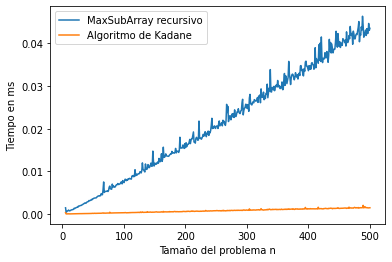

In [ ]:
import datetime
from timeit import repeat
from random import sample
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = sample(range(-500, 501), n)

    # repeat() ejecuta 20 veces los algoritmos con el arreglo aleatorio A y retorna el mejor tiempo obtenido
    t_rec = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({A},0,{len(A)-1})", repeat=1, number=20)
    t_kadane = repeat(setup="from __main__ import kadane", stmt=f"kadane({A},{len(A)})", repeat=1, number=20)
    x.append(n)
    y1.append(t_rec)
    y2.append(t_kadane)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MaxSubArray recursivo", "Algoritmo de Kadane"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 5.1.3 Análisis de Resultados
Al observar la gráfica nos podemos dar cuenta de que el algoritmo de Kadane es extremadamente eficiente en cuanto al tiempo de ejecución con respecto a la implementación recursiva de MaxSubArray, puesto que incluso para tamaños pequeños de problema muestra una significativa ventaja, y esto se puede explicar con el orden de complejidad de Kadane que corresponde a $O(n)$, mientras que anteriormente ya se demostró que la complejidad de nuestra implementación de MaxSubArray es de orden $O(n \log{n})$.

## 5.2 Experimento 2: Comparación de MaxSubArrayMid y MaxSubArray

Para llevar a cabo este experimento, primero se compararán los tiempos de ejecución de ambos algoritmos y luego se comparará el tamaño de la suma del sub-arreglo máximo entregado por cada algoritmo.

La configuración será tamaños de problema $n \in [5,500]$ con muestras aleatorias en el intervalo $[-500,500]$.

### 5.2.1 Comparación de tiempos de ejecución

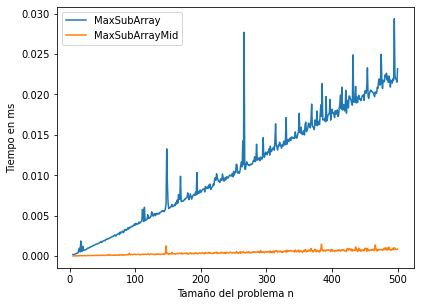

In [ ]:
import datetime
from timeit import repeat
from random import sample
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = sample(range(-500, 501), n)

    # repeat() ejecuta 10 veces los algoritmos con el arreglo aleatorio A y retorna el mejor tiempo obtenido
    t_rec = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({A},0,{len(A)-1})", repeat=1, number=10)
    t_mid = repeat(setup="from __main__ import maxSubArrayMid", stmt=f"maxSubArrayMid({A},0,{len(A)//2},{len(A)-1})", repeat=1, number=10)
    x.append(n)
    y1.append(t_rec)
    y2.append(t_mid)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MaxSubArray", "MaxSubArrayMid"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Tiempo en ms')
plt.show()

### 5.2.2 Comparación de tamaños de suma máxima

In [ ]:
# Aumentar tamaño de gráfico para este experimento
plt.rcParams["figure.figsize"] = (20,3)

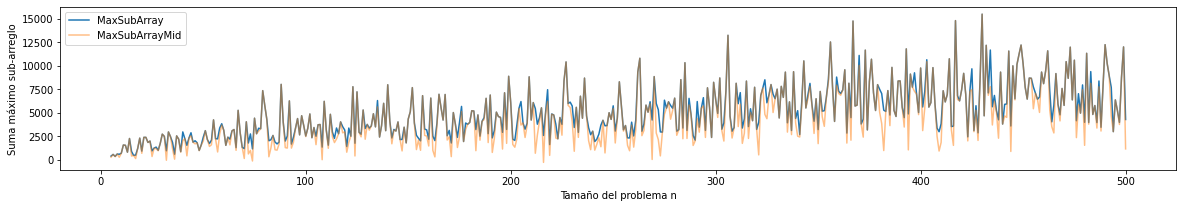

In [ ]:
import datetime
from timeit import repeat
from random import sample
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[];

for n in range(5,501):

    A = sample(range(-500, 501), n)

    a,b,s = maxSubArray(A,0,len(A)-1)
    c,d,s2 = maxSubArrayMid(A,0,len(A)//2,len(A)-1)

    x.append(n)
    y1.append(s)
    y2.append(s2)

plt.plot(x,y1)
plt.plot(x,y2, alpha=0.5)
plt.legend(["MaxSubArray", "MaxSubArrayMid"])

plt.xlabel('Tamaño del problema n')
plt.ylabel('Suma máximo sub-arreglo')
plt.show()

In [ ]:
# Resetear tamaño de gráficos para otros experimentos
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### 5.2.3 Análisis de resultados

En el primer gráfico se puede apreciar como el algoritmo ***MaxSubArrayMid*** logra encontrar soluciones para el problema de forma mucho más rápida que ***MaxSubArray***, esto es algo obvio, puesto que la complejidad de ***MaxSubArrayMid*** es lineal $O(n)$ mientras que la de ***MaxSubArray*** es $O(n \log{n})$, pero que sea más rápido temporalmente no quiere decir que sus soluciones sean óptimas.

Observando el segundo gráfico nos podemos dar cuenta que las soluciones entregadas por ***MaxSubArrayMid*** suelen ser bastante menores a las entregadas por ***MaxSubArray***, y en los únicos casos que llegan a superponerse son los casos donde ***MaxSubArray*** probablemente no pudo encontrar mejores soluciones por lo que se entrega la que calculó el algoritmo ***MaxSubArrayMid***.

A partir de los experimentos realizados anteriormente, podemos concluir que a pesar de que el algoritmo ***MaxSubArrayMid*** sea mas rápido, este no es una buena alternativa para resolver el problema del ***sub-arreglo máximo*** puesto que en la mayoría de los casos aleatorios no es capaz de encontrar una buena solución. Además, concluímos que el mal desempeño de ***MaxSubArrayMid*** en algunos casos se debe a la restricción de que debe contener al elemento **mid**.